                                          # gfs         nam
 Colima Sodar  18.966187 -103.86911     20,30       d1 13,13 d3: 5,5
 Art. Guilles  19.28     -103.70        40,40

In [11]:
model='gfs'
run='les'
domain='d2'
print('../../../../exp_201303_sodar/'+model+'_'+run+'_'+domain+'_20130301.nc')
print('wrf_'+model+'_'+run+'_'+domain+'.pk')

../../../../exp_201303_sodar/gfs_les_d2_20130301.nc
wrf_gfs_les_d2.pk


In [12]:
ls '../../../../exp_201303_sodar/'

domain1_20130301.nc         gfs_pbl_d1_20130322.nc  nam_les_d3_20130301.nc
domain2_20130301.nc         gfs_pbl_d2_20130301.nc  nam_les_d3_20130303_08h.nc
domain3_20130301.nc         gfs_pbl_d2_20130308.nc  nam_les_d3_20130305_16h.nc
gfs_les_d1_20130301.nc      gfs_pbl_d2_20130315.nc  nam_pbl_d1_20130301.nc
gfs_les_d2_20130301.nc      gfs_pbl_d2_20130322.nc  nam_pbl_d1_20130308.nc
gfs_les_d3_20130301.nc      gfs_pbl_d3_20130301.nc  nam_pbl_d2_20130301.nc
gfs_les_d3_20130303_08h.nc  gfs_pbl_d3_20130308.nc  nam_pbl_d2_20130308.nc
gfs_les_d3_20130305_16h.nc  gfs_pbl_d3_20130315.nc  nam_pbl_d3_20130301.nc
gfs_pbl_d1_20130301.nc      gfs_pbl_d3_20130322.nc  nam_pbl_d3_20130308.nc
gfs_pbl_d1_20130308.nc      nam_les_d1_20130301.nc
gfs_pbl_d1_20130315.nc      nam_les_d2_20130301.nc


In [13]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
dataset = Dataset('../../../../exp_201303_sodar/'+model+'_'+run+'_'+domain+'_20130301.nc')
print (dataset.file_format)
print (dataset.dimensions.keys())
#print (dataset.variables.keys())

NETCDF3_64BIT_OFFSET
odict_keys(['Time', 'DateStrLen', 'west_east', 'south_north', 'bottom_top', 'bottom_top_stag', 'soil_layers_stag', 'west_east_stag', 'south_north_stag'])


In [15]:
from wrf import getvar, vinterp, ALL_TIMES
uv, wdir = getvar(dataset, "uvmet_wspd_wdir", units="m s-1", timeidx=ALL_TIMES)
# Interpolate tk to theta-e levels

interp_levels = [.010, .020, .030, .040, .050, .060, .070, .080, .090, .100, .150, .200,
                 .250, .300, .350, .400, .450, .500]

interp_uv = vinterp(dataset, field=uv, vert_coord="ght_agl", interp_levels=interp_levels,
                    timeidx=ALL_TIMES, extrapolate=True, field_type="z", log_p=True)

#interp_wdir = vinterp(dataset, field=wdir, vert_coord="ght_agl", interp_levels=interp_levels,
#                    timeidx=ALL_TIMES, extrapolate=True, field_type="z", log_p=True)

interp_uv.shape

(166, 18, 90, 90)

In [17]:
xx, yy = 29, 29
interp_uv[165,:,xx,yy]

<xarray.DataArray 'uvmet_wspd_wdir' (interp_level: 18)>
array([ 3.009264,  3.009264,  3.009261,  3.008274,  3.007288,  3.006301,
        3.005314,  3.004328,  3.003341,  3.002355,  2.939144,  2.872263,
        2.795945,  2.719164,  2.640158,  2.55814 ,  2.476122,  2.392768], dtype=float32)
Coordinates:
    wspd_wdir     <U4 'wspd'
    XLONG         float32 -103.762
    XLAT          float32 19.2471
    XTIME         float32 9900.0
    Time          datetime64[ns] 2013-03-07T21:00:00
  * interp_level  (interp_level) float64 0.01 0.02 0.03 0.04 0.05 0.06 0.07 ...
Attributes:
    FieldType:         104
    MemoryOrder:       XYZ
    description:       earth rotated wspd,wdir
    units:             m s-1
    stagger:           
    coordinates:       XLONG XLAT XTIME
    projection:        LambertConformal(stand_lon=-103.5999984741211, moad_ce...
    vert_interp_type:  ght_agl

In [13]:
import numpy as np
utc2loc = np.timedelta64(6,'h')
date1 = np.datetime64('2013-03-01')
date2 = np.datetime64('2013-03-07 21:01')
timeArray=np.arange(date1, date2, np.timedelta64(30,'m'))
timeArrayWrf=np.arange(date1+utc2loc, date2+utc2loc, np.timedelta64(10,'m'))
timeArraySod=np.arange(np.datetime64('2012-08-16'), np.datetime64('2013-04-11'),np.timedelta64(30,'m'))
print(timeArrayWrf.size, timeArrayWrf[0], timeArrayWrf[timeArrayWrf.size-1])


(166,)

In [14]:
import pandas as pd
lon, lat = xx, yy
wrf10 = pd.Series(interp_uv[:,0,lon,lat][::3], index=timeArray)
wrf20 = pd.Series(interp_uv[:,1,lon,lat][::3], index=timeArray)
wrf30 = pd.Series(interp_uv[:,2,lon,lat][::3], index=timeArray)
wrf40 = pd.Series(interp_uv[:,3,lon,lat][::3], index=timeArray)
wrf50 = pd.Series(interp_uv[:,4,lon,lat][::3], index=timeArray)
wrf100 = pd.Series(interp_uv[:,5,lon,lat][::3], index=timeArray)
wrf150 = pd.Series(interp_uv[:,6,lon,lat][::3], index=timeArray)
wrf200 = pd.Series(interp_uv[:,7,lon,lat][::3], index=timeArray)
wrf250 = pd.Series(interp_uv[:,8,lon,lat][::3], index=timeArray)
wrf300 = pd.Series(interp_uv[:,9,lon,lat][::3], index=timeArray)
wrf350 = pd.Series(interp_uv[:,10,lon,lat][::3], index=timeArray)
wrf400 = pd.Series(interp_uv[:,11,lon,lat][::3], index=timeArray)
wrf450 = pd.Series(interp_uv[:,12,lon,lat][::3], index=timeArray)
wrf500 = pd.Series(interp_uv[:,13,lon,lat][::3], index=timeArray)
wrf500.shape

In [15]:
import pandas as pd
# Variables to store data temporarily #238 dias * 48dt = 11424 times
# (11424 lineas de los tiempos, 98 niveles)
spd=(pd.read_csv('wind', header=None, low_memory=False)).values.reshape((11424, 98))
drc=(pd.read_csv('direc', header=None, low_memory=False)).values.reshape((11424, 98))

# (11424 lineas de los tiempos, 98 niveles)
spd[spd>99.9] = np.nan
drc[drc>999 ] = np.nan
colNames=["spd_"+str((i+3)*10) for i in range(98)] 
import numpy.ma as ma
spd = np.where(np.isnan(sp), ma.array(sp, mask=np.isnan(sp)).mean(axis=0), sp) 
sp=pd.DataFrame(data=spd, index=timeArraySod, columns=colNames, dtype=None)
dd=pd.DataFrame(data=drc, index=timeArraySod, columns=colNames, dtype=None)

In [20]:
date1 = np.datetime64('2013-03-01')
date2 = np.datetime64('2013-03-07 21:01')
sod30  = pd.Series(sp[date1:date2].iloc[:,0], index=timeArray)
sod50  = pd.Series(sp[date1:date2].iloc[:,2], index=timeArray)
sod100 = pd.Series(sp[date1:date2].iloc[:,7], index=timeArray)
sod150 = pd.Series(sp[date1:date2].iloc[:,12], index=timeArray)
sod200 = pd.Series(sp[date1:date2].iloc[:,17], index=timeArray)
sod250 = pd.Series(sp[date1:date2].iloc[:,22], index=timeArray)
sod300 = pd.Series(sp[date1:date2].iloc[:,27], index=timeArray)
sod350 = pd.Series(sp[date1:date2].iloc[:,32], index=timeArray)
sod400 = pd.Series(sp[date1:date2].iloc[:,37], index=timeArray)
sod450 = pd.Series(sp[date1:date2].iloc[:,42], index=timeArray)
sod500 = pd.Series(sp[date1:date2].iloc[:,47], index=timeArray)
sod500.shape

In [28]:
wrf1 = pd.DataFrame(index=timeArray)
wrf1['w10'] = wrf10
wrf1['w20'] = wrf20
wrf1['w30'] = wrf30
wrf1['s30'] = sod30
wrf1['w50'] = wrf50
wrf1['s50'] = sod50
wrf1['w100'] = wrf100
wrf1['s100'] = sod100
wrf1['w150'] = wrf150
wrf1['s150'] = sod150
wrf1['w200'] = wrf200
wrf1['s200'] = sod200
wrf1['w250'] = wrf250
wrf1['s250'] = sod250
wrf1['w300'] = wrf300
wrf1['s300'] = sod300
wrf1['w350'] = wrf350
wrf1['s350'] = sod350
wrf1['w400'] = wrf400
wrf1['s400'] = sod400
wrf1['w450'] = wrf450
wrf1['s450'] = sod450
wrf1['w500'] = wrf500
wrf1['s500'] = sod500
wrf1.to_pickle('wrf_'+model+'_'+run+'_'+domain+'.pk')
wrf1

,w10,w20,w30,s30,w50,s50,w100,s100,w150,s150,...,w300,s300,w350,s350,w400,s400,w450,s450,w500,s500
2013-03-01 00:00:00,3.549772,3.549772,3.548934,3.08,3.531916,0.54,3.489587,1.50,3.480444,0.64,...,3.373941,0.03,3.279525,1.24,3.158572,2.46,3.037621,3.96,2.898308,3.34
2013-03-01 01:00:00,3.535684,3.535684,3.536795,3.30,3.554413,1.92,3.582673,1.62,2.981715,0.76,...,1.987603,NaN,1.925725,0.54,1.936844,0.95,1.947963,2.50,1.835297,4.18
2013-03-01 02:00:00,2.487188,2.487188,2.467008,2.07,2.149417,1.19,1.362458,1.02,0.890505,0.49,...,1.276956,0.65,1.488212,0.78,1.607072,1.76,1.725934,3.59,1.716350,5.53
2013-03-01 03:00:00,0.737840,0.737840,0.743261,0.79,0.837758,0.28,1.075825,0.25,1.425348,0.13,...,2.335038,0.34,2.426637,0.73,2.419192,1.60,2.411747,3.73,2.204081,5.41
2013-03-01 04:00:00,1.245936,1.245936,1.240288,2.80,1.151309,3.22,0.934972,2.36,0.966813,1.23,...,1.168335,0.71,1.161883,0.92,1.113940,1.64,1.065997,1.41,0.974550,2.48
2013-03-01 05:00:00,1.904039,1.904039,1.872864,NaN,1.380849,3.53,0.190187,1.08,0.579789,0.69,...,1.750314,2.94,1.950771,3.27,2.062906,2.75,2.175042,2.16,2.183861,0.29
2013-03-01 06:00:00,1.414663,1.414663,1.402085,3.22,1.209696,3.52,0.740383,2.02,0.688937,1.42,...,1.344291,0.91,1.753658,0.41,2.198018,1.12,2.642405,2.85,2.814198,0.71
2013-03-01 07:00:00,2.577525,2.577525,2.564403,4.53,2.366332,5.97,1.885184,4.12,1.882940,2.15,...,2.041990,1.17,2.250303,1.00,2.515940,NaN,2.781587,NaN,3.002120,NaN
2013-03-01 08:00:00,3.325346,3.325346,3.298746,2.62,2.903794,2.54,1.940663,4.61,1.788369,4.20,...,0.922144,1.29,1.007471,1.23,1.278143,0.88,1.548825,0.86,1.867332,NaN
2013-03-01 09:00:00,2.111505,2.111505,2.098123,1.51,1.902615,1.85,1.413334,1.92,0.907525,2.65,...,0.830655,5.19,1.143416,4.62,1.515892,3.44,1.888387,2.48,2.138277,1.94


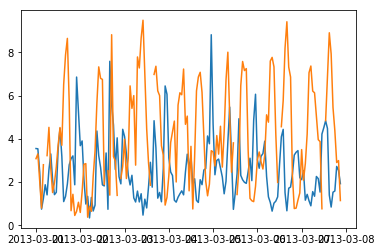

In [29]:
plt.plot(wrf1['w30'])
plt.plot(wrf1['s30'])
plt.show()

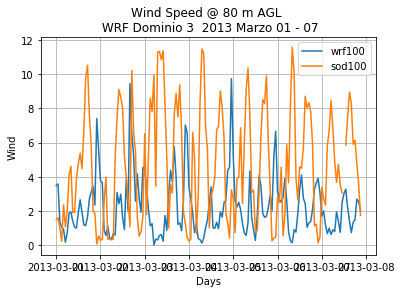

In [30]:
import pandas as pd

plt.plot(wrf100, label='wrf100')
plt.plot(sod100, label='sod100')

plt.title('Wind Speed @ 80 m AGL \n WRF Dominio 3  2013 Marzo 01 - 07')
plt.ylabel('Wind')
plt.xlabel('Days')

dt=6

plt.grid(True)
plt.legend()
#plt.savefig('sodar_20130310_wrf_d03.png', dpi=400)
plt.show()


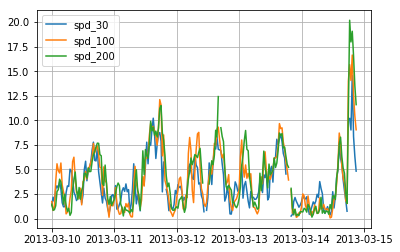

In [31]:
s30 = sp['2013-03-10':'2013-03-14 21:00'].iloc[:,0]
s100 = sp['2013-03-10':'2013-03-14 21:00'].iloc[:,7]
s200 = sp['2013-03-10':'2013-03-14 21:00'].iloc[:,17]
plt.plot(s30)
plt.plot(s100)
plt.plot(s200)
plt.legend()
plt.grid(True)
plt.savefig('sodar_20130310_30_200_wrf_d03.png', dpi=400)


In [32]:
np.cov(wrf100, wrf80)

array([[ 2.9511774 ,  2.76473718],
       [ 2.76473718,  2.62118899]])

In [35]:
np.cov(wrf100, sod100)

array([[ 2.9511774,        nan],
       [       nan,        nan]])

In [34]:
print(wrf100.shape, sod100.shape)

(166,) (166,)
